In [1]:
from nlprocessing import ProcessCorpus
import pandas as pd
from nltk.corpus import words
import gensim

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
data1 = pd.read_csv('../data/comments.csv', sep='|').dropna()
data2 = pd.read_csv('../data/more_comments.csv').dropna()
data = data1.append(data2, ignore_index=True)
data = data[~data.duplicated()]
data = data[data['subreddit'] != 'politics']
test = data['text'].sample(n=10000)

In [3]:
corpus = ProcessCorpus()
corpus.fit(test, frequency=2)

In [25]:
model = gensim.models.LdaModel(
    corpus=corpus.gensim_corpus_filtered,
    id2word=corpus.gensim_dictionary,
    num_topics=5,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

In [33]:
coherence = gensim.models.CoherenceModel(
    model=model,
    texts=corpus.corpus_filtered,
    corpus=corpus.gensim_corpus_filtered
)
coherence.get_coherence()

0.5755995285087667

In [42]:
def find_perplexity_coherence(n_topics):
    model = gensim.models.LdaModel(
        corpus=corpus.gensim_corpus_filtered,
        id2word=corpus.gensim_dictionary,
        num_topics=5,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        eta='auto',
        per_word_topics=True
    )
    coherence = gensim.models.CoherenceModel(
        model=model,
        texts=corpus.corpus_filtered,
        corpus=corpus.gensim_corpus_filtered
    )
    return [n_topics, model.log_perplexity(corpus.gensim_corpus_filtered), coherence.get_coherence()]

In [51]:
def new_random_sample():
    test = data['text'].sample(n=10000)
    corpus = ProcessCorpus()
    corpus.fit(test, frequency=2)
    return corpus

In [54]:
coherence = {new_list: [] for new_list in range(2,30,3)}
perplexity = {new_list: [] for new_list in range(2,30,3)}
for j in range(5):
#     corpus = new_random_sample()
    for i in range(2,30,3):
        _, p, c = find_perplexity_coherence(i)
        coherence[i].append(c)
        perplexity[i].append(p)

({2: [0.5794747213541427,
   0.6004300040846695,
   0.5659568867894853,
   0.5845094726573095,
   0.6019885038436528],
  5: [0.5581357839026222,
   0.6045552835635952,
   0.5787045579412343,
   0.5852093850005661,
   0.5982638244345647],
  8: [0.5858693728921971,
   0.6177092915924648,
   0.5528993851091155,
   0.5941099151842477,
   0.5829440901807226],
  11: [0.5917437510513529,
   0.5853737893041893,
   0.5853016302135162,
   0.6106977931084663,
   0.5889655910506306],
  14: [0.576027143510943,
   0.5791875045423126,
   0.5504760691533711,
   0.5978668648317405,
   0.5946342407143786],
  17: [0.5608061074152166,
   0.6096190051915278,
   0.5806986225776388,
   0.5921677490308459,
   0.5951759721374711],
  20: [0.5480596873441955,
   0.6014154975870706,
   0.5986388897111613,
   0.5972238288975069,
   0.5722506714447821],
  23: [0.5933243353583243,
   0.5946009033103765,
   0.5729660467210941,
   0.5925055476813392,
   0.5917618152670818],
  26: [0.5597350647233734,
   0.619044226066

In [55]:
def mean_dict(dictionary):
    mean = {}
    for key in dictionary:
        mean[key] = sum(dictionary[key])/len(dictionary[key])
    return mean

In [56]:
mean_dict(coherence)

{2: 0.586471917745852,
 5: 0.5849737669685166,
 8: 0.5867064109917495,
 11: 0.5924165109456311,
 14: 0.5796383645505492,
 17: 0.5876934912705402,
 20: 0.5835177149969433,
 23: 0.5890317296676432,
 26: 0.5894823055413456,
 29: 0.588542152779369}

In [57]:
mean_dict(perplexity)

{2: -7.927729328032086,
 5: -7.9246591060022125,
 8: -7.928000312988056,
 11: -7.926179996584199,
 14: -7.929743388957009,
 17: -7.924279146870083,
 20: -7.92737135880904,
 23: -7.92690732148877,
 26: -7.927526974129961,
 29: -7.927756604965198}

In [69]:
import numpy as np
x = list(mean_dict(coherence).keys())
y1 = list(mean_dict(coherence).values())
y2 = np.array(list(mean_dict(perplexity).values()))

In [71]:
y2+8

array([0.07227067, 0.07534089, 0.07199969, 0.07382   , 0.07025661,
       0.07572085, 0.07262864, 0.07309268, 0.07247303, 0.0722434 ])

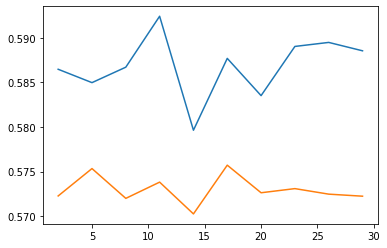

In [75]:
plt.plot(x,y1)
plt.plot(x,y2+8.5)

In [26]:
# model = gensim.models.LdaModel.load('mdl/model2/full_corpus_model')

In [91]:
model.get_document_topics(corpus.gensim_corpus, per_word_topics=True)[50]

([(0, 0.12705053),
  (1, 0.40498552),
  (2, 0.19406198),
  (3, 0.11966491),
  (4, 0.15423709)],
 [(395, [1, 2, 4, 0, 3]),
  (432, [2, 1, 4, 0, 3]),
  (433, [1]),
  (434, [1, 2, 4, 0, 3]),
  (435, [1]),
  (436, [1, 2, 4, 0, 3]),
  (437, [1, 2, 4, 0, 3]),
  (438, [1, 2, 4, 0, 3]),
  (439, [1, 2, 4, 0, 3]),
  (440, [1, 2, 4, 0, 3])],
 [(395,
   [(0, 0.12140708),
    (1, 0.35436654),
    (2, 0.16889648),
    (3, 0.114979394),
    (4, 0.13117568)]),
  (432,
   [(0, 0.06410742),
    (1, 0.26843724),
    (2, 0.403235),
    (3, 0.054965414),
    (4, 0.20862435)]),
  (433, [(1, 0.9992467)]),
  (434,
   [(0, 0.12140708),
    (1, 0.35436654),
    (2, 0.16889648),
    (3, 0.114979394),
    (4, 0.13117568)]),
  (435, [(1, 0.9998736)]),
  (436,
   [(0, 0.12140708),
    (1, 0.35436654),
    (2, 0.16889648),
    (3, 0.114979394),
    (4, 0.13117568)]),
  (437,
   [(0, 0.12140708),
    (1, 0.35436654),
    (2, 0.16889648),
    (3, 0.114979394),
    (4, 0.13117568)]),
  (438,
   [(0, 0.12140708),
    (1

In [45]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus.gensim_corpus, corpus.gensim_dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.028872 -0.065991       1        1  24.030349
0      0.033400 -0.061689       2        1  22.505203
2      0.020421 -0.150770       3        1  18.303776
1     -0.233692  0.090986       4        1  18.123605
4      0.150999  0.187465       5        1  17.037068, topic_info=           Term         Freq        Total Category  logprob  loglift
77          lol  2608.000000  2608.000000  Default  30.0000  30.0000
183      crypto  1392.000000  1392.000000  Default  29.0000  29.0000
170         eth  1229.000000  1229.000000  Default  28.0000  28.0000
1093        gme  1512.000000  1512.000000  Default  27.0000  27.0000
176         etc  1162.000000  1162.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
31    purchased   101.683982   106.798292   Topic5  -5.3586   1.7207
4954         ac    96.619996   101.801372   Topic5  -5.4097   1.7175
3038      loses    95.880964   101.031285   Topic5  -5.4174   1.7175
4281      april    92.259041    97.398577   Topic5  -5.4559   1.7156
2670       ebay    92.923436    98.224835   Topic5  -5.4487   1.7143

[187 rows x 6 columns], token_table=      Topic      Freq Term
term                      
4954      1  0.019646   ac
4954      2  0.019646   ac
4954      3  0.009823   ac
4954      4  0.009823   ac
4954      5  0.952836   ac
...     ...       ...  ...
1838      1  0.984767    🚀
1838      2  0.003443    🚀
1838      3  0.003443    🚀
1838      4  0.003443    🚀
1838      5  0.003443    🚀

[785 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5])

In [58]:
pyLDAvis.save_html(vis,'../img/lda_vis.html')